# Chargement des données


In [4]:
!git clone https://github.com/Romain-Malinge/Deep_learning_groupe_A.git
path = "./Deep_learning_groupe_A/BD/"

Cloning into 'Deep_learning_groupe_A'...
remote: Enumerating objects: 115497, done.
remote: Counting objects: 100% (25024/25024), done.
remote: Compressing objects: 100% (25022/25022), done.
remote: Total 115497 (delta 6), reused 25018 (delta 2), pack-reused 90473
Receiving objects: 100% (115497/115497), 6.92 GiB | 14.39 MiB/s, done.
Resolving deltas: 100% (251/251), done.
Updating files: 100% (102439/102439), done.


In [2]:
import shutil
import os, sys
import PIL
import glob
import keras
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from scipy.io import loadmat

from keras import optimizers
from keras import backend as K
from keras.models import Model
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import GlobalAveragePooling2D, Input, Flatten
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator


Voici ensuite un exemple de chargement de vos données. Notez que vous pouvez modifier la dimension des images, ce qui sera utile à différents stades de votre projet.

In [5]:
row = 192
col = 256

b_size = 500

datagen = ImageDataGenerator(rescale=1./255)

train_dir = path + 'entrainement'
val_dir = path + 'validation'
test_dir = path + 'test'

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(row,col),
    batch_size=b_size,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(row,col),
    batch_size=b_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(row,col),
    batch_size=20,
    class_mode='categorical'
)

Found 100000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.
Found 100 images belonging to 4 classes.


Vous pouvez utiliser le bloc suivant pour afficher quelques-unes de vos images, et ainsi vérifier que tout s'est bien passé.

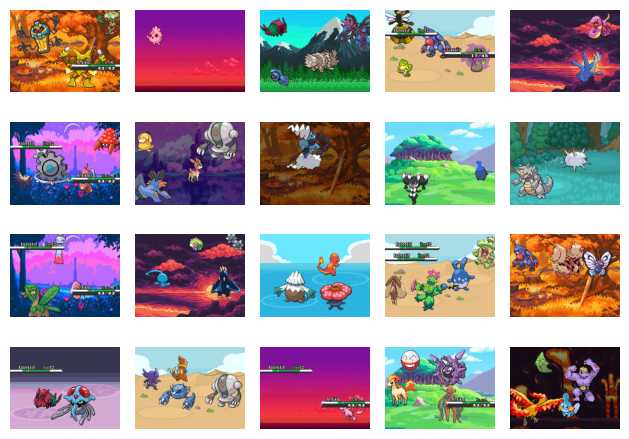

In [6]:
for i in range(20):
    img, label = train_generator.next()
    plt.subplot(4, 5, i+1)
    plt.axis('off')
    plt.imshow(img[0])


plt.tight_layout()
plt.show()

#  Création de notre réseau de neurones

Dans un premier temps nous allons utiliser un réseau basique et voir les résultats.

In [ ]:
base_layer = keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(row, col, 3))

pool1 = base_layer.output
pool1 = GlobalAveragePooling2D()(pool1)
dense1 = Dense(1024, activation = 'relu')(pool1)
dense1 = Dense(512, activation = 'relu')(dense1)
dense1 = Dense(256, activation = 'relu')(dense1)
dense1 = Dense(128, activation = 'relu')(dense1)
dense1 = Dense(4, activation = 'softmax')(dense1)

model = Model(base_layer.input, dense1)

for layer in base_layer.layers:
    layer.trainable = False

model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 192, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 198, 262, 3)          0         ['input_6[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 96, 128, 64)          9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 96, 128, 64)          256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
# Fonction cout
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])

In [ ]:
# Analyse de notre modèle
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=val_generator,
                    validation_steps=len(val_generator),
                    verbose=2)

Epoch 1/10
200/200 - 606s - loss: 1.1282 - accuracy: 0.4622 - val_loss: 1.1321 - val_accuracy: 0.4690 - 606s/epoch - 3s/step
Epoch 2/10
200/200 - 551s - loss: 1.0095 - accuracy: 0.5220 - val_loss: 0.9689 - val_accuracy: 0.5450 - 551s/epoch - 3s/step
Epoch 3/10
200/200 - 532s - loss: 0.9567 - accuracy: 0.5521 - val_loss: 0.9434 - val_accuracy: 0.5570 - 532s/epoch - 3s/step
Epoch 4/10
200/200 - 526s - loss: 0.9201 - accuracy: 0.5690 - val_loss: 0.8804 - val_accuracy: 0.5980 - 526s/epoch - 3s/step
Epoch 5/10
200/200 - 529s - loss: 0.8909 - accuracy: 0.5839 - val_loss: 0.9750 - val_accuracy: 0.5330 - 529s/epoch - 3s/step
Epoch 6/10
200/200 - 528s - loss: 0.8742 - accuracy: 0.5937 - val_loss: 0.8259 - val_accuracy: 0.6350 - 528s/epoch - 3s/step
Epoch 7/10
200/200 - 532s - loss: 0.8653 - accuracy: 0.5986 - val_loss: 0.8125 - val_accuracy: 0.6360 - 532s/epoch - 3s/step
Epoch 8/10
200/200 - 532s - loss: 0.8513 - accuracy: 0.6030 - val_loss: 0.8610 - val_accuracy: 0.6000 - 532s/epoch - 3s/step


In [ ]:
def plot_training_analysis():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

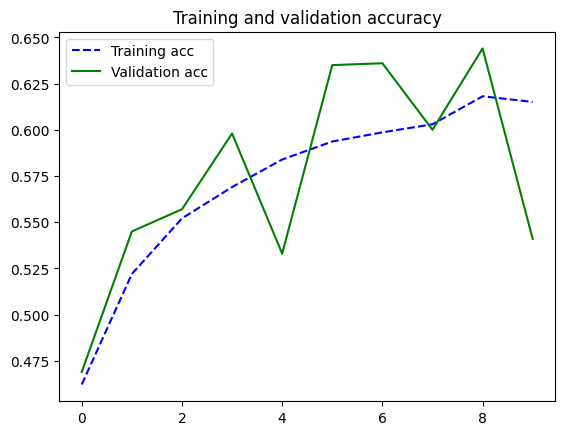

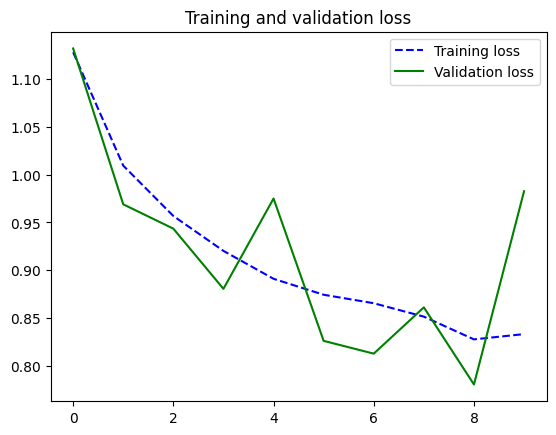

In [ ]:
# Affichage du training
plot_training_analysis()

Pour les données de test, il faudra utiliser un evaluate.
Le code suivant ne fonctionne pas.


In [ ]:
results = model.evaluate(test_generator)
print("test loss, test acc:", results)

# version 4 : 47%

5/5 [==============================] - 3s 104ms/step - loss: 1.0782 - accuracy: 0.4700
test loss, test acc: [1.0782150030136108, 0.4699999988079071]


La suite du code n'a pas pu être executée à cause d'une surcharge de la RAM et du temps d'entrainement du modèle ( ~1h40).

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Initialiser les listes pour stocker les étiquettes vraies et les prédictions
true_labels_all = []
predicted_classes_all = []
images_all = []  # Liste pour stocker les images
total_batches = len(val_generator)
i = 0
max_batches = 50

# Itérer sur toutes les données de val_generator
for images, labels in val_generator:
    print('Processing batch', i + 1, 'out of', total_batches)

    # Prédire les classes pour le lot actuel
    predictions = model.predict(images)

    # Convertir les étiquettes en classes
    labels = np.argmax(labels, axis=1)
    predicted_classes = np.argmax(predictions, axis=1)

    # Ajouter les étiquettes, prédictions et images aux listes
    true_labels_all.extend(labels)
    predicted_classes_all.extend(predicted_classes)
    images_all.extend(images)

    i += 1

    if i >= max_batches:
        break

# Convertir en tableaux numpy pour le calcul de l'accuracy
true_labels_all = np.array(true_labels_all)
predicted_classes_all = np.array(predicted_classes_all)
images_all = np.array(images_all)

# Calcul de l'accuracy pour l'ensemble de val_generator
correct_predictions = np.sum(predicted_classes_all == true_labels_all)
accuracy = correct_predictions / len(true_labels_all)

# Affichage de l'accuracy
print("Accuracy for the first", max_batches, "batches in val_generator:", accuracy)

Processing batch 1 out of 2


NameError: name 'model' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

# Calcul de la matrice de confusion
cm = confusion_matrix(true_labels_all, predicted_classes_all)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['1','2','3','4']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
# Identifier les indices des prédictions incorrectes
incorrect_indices = np.where(predicted_classes_all != true_labels_all)[0]

# Sélectionner 2 exemples mal prédits pour chaque classe
num_classes = 4
num_samples_per_class = 2
selected_indices = []

for class_idx in range(num_classes):
    class_incorrect_indices = incorrect_indices[true_labels_all[incorrect_indices] == class_idx]
    if len(class_incorrect_indices) >= num_samples_per_class:
        selected_indices.extend(class_incorrect_indices[:num_samples_per_class])
    else:
        selected_indices.extend(class_incorrect_indices)

# Afficher les images mal prédites avec leurs étiquettes vraies et prédictions
fig, axes = plt.subplots(num_samples_per_class, num_classes, figsize=(10, 10))

for i, idx in enumerate(selected_indices):
    ax = axes[ i % num_samples_per_class, i // num_samples_per_class]
    img = images_all[idx]
    if img.max() <= 1.0:  # Vérifiez si les valeurs sont normalisées entre 0 et 1
        img = (img * 255).astype('uint8')
    ax.imshow(img)
    ax.set_title(f"True: {true_labels_all[idx] + 1}, Pred: {predicted_classes_all[idx] + 1}")
    ax.axis('off')

plt.tight_layout()
plt.show()